In [ ]:
# Import relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Pretty as disp
!pip install plotly
import plotly.express as px
!pip install squarify
import squarify

In [ ]:
#Read the file 
bc = pd.read_csv('BankChurners.csv')

In [ ]:
# Get informations on the file
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

None of the columns has any null values. However, the dataset already has two models as new columns so we will delete them for the cleaning/exploration. We will also delete the ClientNum column since it's just an ID number and won't help for prediction.


In [ ]:
# See the data 
bc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# Deletion of the model columns and the client num column 
bc = bc.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", "CLIENTNUM"],  axis = 1)

In [ ]:
bc.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
bc['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [ ]:
# recodes income categories from strings to integers

def income_groups(category):
    if category == "Less than $40K":
        return 1
    elif category == "$40K - $60K":
        return 2
    elif category == "$60K - $80K":
        return 3
    elif category == "$80K - $120K":
        return 4
    elif category == "$120K +":
        return 5
    
bc['Income_Category'] = bc['Income_Category'].apply(income_groups)


In [ ]:
# it appears the 'Unknown' income group has changed to a nan value
bc['Income_Category'].unique()

array([ 3.,  1.,  4.,  2.,  5., nan])

In [ ]:
# finding the average income group
bc['Income_Category'].mean()

2.342983915696062

In [ ]:
# filling all of the previously 'Unknown' incomes with the average income (which ends up being closest to 2)

bc['Income_Category'] = bc['Income_Category'].fillna(2)
bc['Income_Category'].unique()

array([3., 1., 4., 2., 5.])

In [ ]:
# placing each customer in an age group for EDA purposes-- can remove this column later

bc['Age_Group'] = pd.cut(bc['Customer_Age'].dropna(), bins=[20,30,40,50,60,70,80])

In [ ]:
# count of number of customers in each age group who hold each type of card

bc.rename(columns={'Attrition_Flag':'Count'}).groupby(['Card_Category','Age_Group']).count()[['Count']].fillna(0)

Count
Card_Category Age_Group        
Blue          (20, 30]    252.0
              (30, 40]   1994.0
              (40, 50]   4278.0
              (50, 60]   2523.0
              (60, 70]    388.0
              (70, 80]      1.0
Gold          (20, 30]      1.0
              (30, 40]     24.0
              (40, 50]     66.0
              (50, 60]     23.0
              (60, 70]      2.0
              (70, 80]      0.0
Platinum      (20, 30]      0.0
              (30, 40]      1.0
              (40, 50]     11.0
              (50, 60]      8.0
              (60, 70]      0.0
              (70, 80]      0.0
Silver        (20, 30]     12.0
              (30, 40]    113.0
              (40, 50]    297.0
              (50, 60]    119.0
              (60, 70]     14.0
              (70, 80]      0.0

In [ ]:
# Look deeper into the data 
bc.describe()

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,2.305322,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,1.284294,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# looking at how many customers in our data churned or not
bc.groupby('Attrition_Flag').size()/bc.shape[0]

Attrition_Flag
Attrited Customer    0.16066
Existing Customer    0.83934
dtype: float64

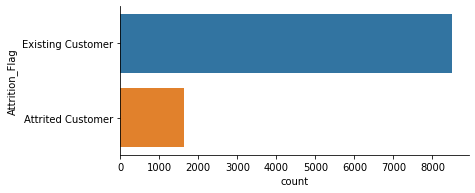

In [ ]:
# visualizing the amount of customers who have churned 

sns.catplot(y="Attrition_Flag", kind="count", data=bc, height=2.6, aspect=2.5)

In [ ]:
# average total transaction amounts for attrited vs existing customers by card category

bc.pivot_table(values='Total_Trans_Amt', index='Card_Category', columns='Attrition_Flag', aggfunc='mean')

Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,2954.164582,4469.314387
Gold,5841.809524,8093.189474
Platinum,4755.800000,10414.400000
Silver,4899.682927,6883.602537


In [ ]:
# average months inactive in the last year for attrited vs existing customers by age group

bc.pivot_table(values='Months_Inactive_12_mon', index='Age_Group', columns='Attrition_Flag', aggfunc='mean')

Attrition_Flag,Attrited Customer,Existing Customer
Age_Group,,
"(20, 30]",1.843750,2.214592
"(30, 40]",2.358065,2.244237
"(40, 50]",2.690629,2.283501
"(50, 60]",2.955357,2.288539
"(60, 70]",2.965517,2.263006
"(70, 80]",NaN,3.000000


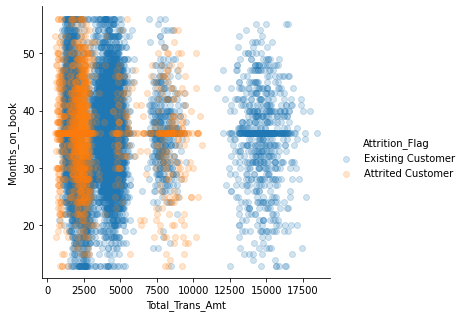

In [ ]:
# looking at relationship between months on book and total transaction amount for attrited vs existing customers

g = sns.PairGrid(bc, y_vars=["Months_on_book"], x_vars=['Total_Trans_Amt'], height=4.5, hue="Attrition_Flag", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.2)
g.add_legend();

In [ ]:
# Taking that column out since we woulnd't have this information in the future--it is measured from sign up to attrition 
bc = bc.drop('Months_on_book', axis = 1)

# dropping Age Group column since that was just for data exploration purposes and we have actual age already
bc = bc.drop('Age_Group', axis=1)

In [ ]:
# Changing categorical variables to dummy variables 
bc = pd.get_dummies(bc, columns=['Gender', 'Education_Level', 'Marital_Status','Card_Category', 'Attrition_Flag'], drop_first = True)

bc.head()

,Customer_Age,Dependent_count,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Existing Customer
0,45,3,3.0,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,49,5,1.0,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,1,0,0,0,0,1
2,51,3,4.0,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1,0,1,0,0,0,0,1,0,0,0,0,0,1
3,40,4,1.0,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,40,3,3.0,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1,0,0,0,0,1,0,1,0,0,0,0,0,1


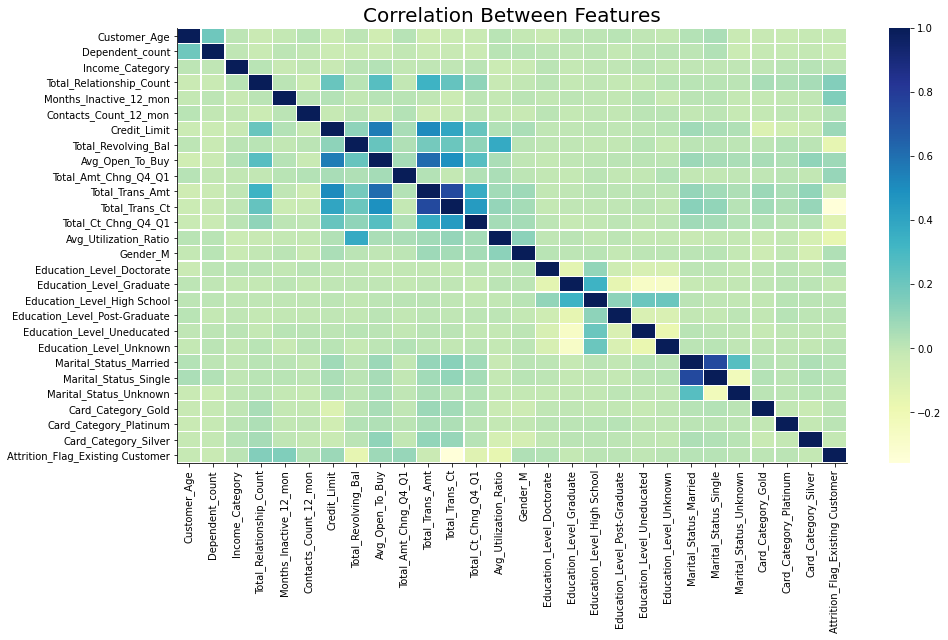

In [ ]:
# Heat map to see obvious correlations between variables 
plt.figure(figsize=(15, 8))
corr = bc.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")
plt.title('Correlation Between Features', fontsize=20)
sns.despine();

In [ ]:
bc.to_csv('BankChurnersCleaned.csv')

cp: cannot create regular file 'drive/My Drive/MSBA/Supervised ML': No such file or directory
